# 1.0 Introduction

### 1.1 Aim of Project 
This project uses data science tools like Pandas, Jupyter Notebook, and Matplotlib to unravel the subtle patterns found in Canada's death rates. A dataset covering Canada from 2000 to 2022 will be used.   


# 2.0 Dataset Collection and Preparation 

### 2.1 Loading the Dataset with required libraries.

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

### 2.2 Loaded the dataset into dataframe using Pyspark

In [2]:
#death_data reads and stores the data from death_data.csv
death_data = spark.read.option("inferSchema", "true")\
.option("header", "true")\
.option("delimiter", ",")\
.csv(r"death_data.csv") 

In [3]:
death_data

DataFrame[REF_DATE: int, GEO: string, DGUID: string, Sex: string, Leading causes of death (ICD-10): string, Characteristics: string, UOM: string, UOM_ID: int, SCALAR_FACTOR: string, SCALAR_ID: int, VECTOR: string, COORDINATE: string, VALUE: int, STATUS: string, SYMBOL: string, TERMINATED: string, DECIMALS: int]

### 2.3 Cleaning process step 1: Removing the unwanted columns

In [4]:
# Specify the columns you want to drop
columns_to_drop = ['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'CHARACTERISTICS', 'UOM']

# Drop the specified columns
death_data = death_data.drop(*columns_to_drop)

# Show the updated DataFrame
death_data.show()

+--------+--------------------+----------+--------------------------------+------+
|REF_DATE|                 GEO|       Sex|Leading causes of death (ICD-10)| VALUE|
+--------+--------------------+----------+--------------------------------+------+
|    2000|Canada, place of ...|Both sexes|            Total, all causes...|218062|
|    2001|Canada, place of ...|Both sexes|            Total, all causes...|219538|
|    2002|Canada, place of ...|Both sexes|            Total, all causes...|223603|
|    2003|Canada, place of ...|Both sexes|            Total, all causes...|226169|
|    2004|Canada, place of ...|Both sexes|            Total, all causes...|226584|
|    2005|Canada, place of ...|Both sexes|            Total, all causes...|230132|
|    2006|Canada, place of ...|Both sexes|            Total, all causes...|228079|
|    2007|Canada, place of ...|Both sexes|            Total, all causes...|235217|
|    2008|Canada, place of ...|Both sexes|            Total, all causes...|238617|
|   

### 2.4 Cleaning process step 2: Rename columns for proper identification

In [5]:
# Rename the specified columns
death_data = death_data \
    .withColumnRenamed("REF_DATE", "year") \
    .withColumnRenamed("GEO", "residence") \
    .withColumnRenamed("Leading causes of death (ICD-10)", "cause") \
    .withColumnRenamed("Sex", "sex") \
    .withColumnRenamed("VALUE", "value")

# Show the updated DataFrame
death_data.show()

+----+--------------------+----------+--------------------+------+
|year|           residence|       sex|               cause| value|
+----+--------------------+----------+--------------------+------+
|2000|Canada, place of ...|Both sexes|Total, all causes...|218062|
|2001|Canada, place of ...|Both sexes|Total, all causes...|219538|
|2002|Canada, place of ...|Both sexes|Total, all causes...|223603|
|2003|Canada, place of ...|Both sexes|Total, all causes...|226169|
|2004|Canada, place of ...|Both sexes|Total, all causes...|226584|
|2005|Canada, place of ...|Both sexes|Total, all causes...|230132|
|2006|Canada, place of ...|Both sexes|Total, all causes...|228079|
|2007|Canada, place of ...|Both sexes|Total, all causes...|235217|
|2008|Canada, place of ...|Both sexes|Total, all causes...|238617|
|2009|Canada, place of ...|Both sexes|Total, all causes...|238418|
|2010|Canada, place of ...|Both sexes|Total, all causes...|240075|
|2011|Canada, place of ...|Both sexes|Total, all causes...|243

### 2.5 Cleaning process step 3: Cleaninhg dirty data

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, when, col, coalesce, lit
from pyspark.sql.types import IntegerType

# Perform the transformations
cleaned_df = death_data.withColumn("residence", regexp_replace("residence", ", place of residence", "")) \
                       .withColumn("cause", regexp_replace("cause", ', all causes of death', ' - all causes')) \
                       .withColumn("sex", when(col("sex") == 'Males', 'male')
                                         .when(col("sex") == 'Females', 'female')
                                           .when(col("sex") == "Both sexes", 'both')
                                         .otherwise(col("sex"))) \
                       .withColumn("value", coalesce(col("value").cast(IntegerType()), lit(0)))

# Show the cleaned DataFrame
cleaned_df.show()

death_data = cleaned_df

+----+---------+----+--------------------+------+
|year|residence| sex|               cause| value|
+----+---------+----+--------------------+------+
|2000|   Canada|both|Total - all cause...|218062|
|2001|   Canada|both|Total - all cause...|219538|
|2002|   Canada|both|Total - all cause...|223603|
|2003|   Canada|both|Total - all cause...|226169|
|2004|   Canada|both|Total - all cause...|226584|
|2005|   Canada|both|Total - all cause...|230132|
|2006|   Canada|both|Total - all cause...|228079|
|2007|   Canada|both|Total - all cause...|235217|
|2008|   Canada|both|Total - all cause...|238617|
|2009|   Canada|both|Total - all cause...|238418|
|2010|   Canada|both|Total - all cause...|240075|
|2011|   Canada|both|Total - all cause...|243511|
|2012|   Canada|both|Total - all cause...|246596|
|2013|   Canada|both|Total - all cause...|252338|
|2014|   Canada|both|Total - all cause...|258821|
|2015|   Canada|both|Total - all cause...|264333|
|2016|   Canada|both|Total - all cause...|267213|


##### Color codes used for visualizations

In [7]:
earth_tones = ['saddlebrown', 'sienna', 'peru', 'darkolivegreen', 'olivedrab', 'olive', 'burlywood', 'wheat', 'navajowhite', 'palegoldenrod']
pastel_shades = ['thistle', 'lavender', 'lightpink', 'lightcoral', 'lemonchiffon', 'lightyellow', 'palegreen', 'lightgreen', 'powderblue', 'lightskyblue']
autumn_colors = ['darkred', 'firebrick', 'sandybrown', 'peru', 'darkorange', 'coral', 'orangered', 'tomato', 'burlywood', 'indianred']
cool_blues = ['midnightblue', 'darkblue', 'mediumblue', 'royalblue', 'slateblue', 'mediumslateblue', 'steelblue', 'cornflowerblue', 'dodgerblue', 'skyblue']
spring_palette = ['darkseagreen', 'seagreen', 'mediumseagreen', 'limegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'springgreen', 'mediumspringgreen', 'aquamarine']
warm_sunset = ['darkorange', 'lightsalmon', 'rosybrown', 'coral', 'tomato', 'mistyrose', 'lightcoral', 'peachpuff', 'orangered', 'indianred']
vibrant_reds = ['darkred', 'firebrick', 'indianred', 'maroon', 'darkmagenta', 'red', 'crimson', 'orangered', 'darkorange', 'tomato']
ocean_blues = ['darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'royalblue', 'dodgerblue', 'steelblue', 'cornflowerblue', 'skyblue', 'lightskyblue']
muted_greens = ['darkgreen', 'green', 'olive', 'olivedrab', 'darkolivegreen', 'limegreen', 'yellowgreen', 'chartreuse', 'mediumseagreen', 'forestgreen']
purple_hues = ['darkviolet', 'purple', 'darkmagenta', 'mediumorchid', 'darkorchid', 'blueviolet', 'slateblue', 'mediumslateblue', 'darkslateblue', 'indigo']
sunrise_warmth = ['darkbrown', 'saddlebrown', 'sienna', 'peru', 'burlywood', 'darkgoldenrod', 'gold', 'tomato', 'orangered', 'coral']
forest_canopy = ['darkgreen', 'green', 'darkolivegreen', 'olive', 'olivedrab', 'darkseagreen', 'seagreen', 'mediumseagreen', 'limegreen', 'chartreuse', 'yellowgreen', 'forestgreen', 'mediumaquamarine']
fruit_punch = ['darkred', 'chocolate', 'sienna', 'saddlebrown', 'peru', 'coral', 'darkorange', 'orangered', 'tomato', 'crimson']
soft_neutrals = ['black', 'darkslategray', 'slategray', 'dimgray', 'gray', 'darkgrey', 'silver', 'lightgrey', 'gainsboro', 'whitesmoke']
desert_sands = ['darkkhaki', 'chocolate', 'sienna', 'saddlebrown', 'peru', 'tan', 'burlywood', 'wheat', 'rosybrown', 'navajowhite']
ocean_sunset = ['darkgoldenrod', 'goldenrod', 'orangered', 'darkorange', 'darkmagenta', 'darkorchid', 'mediumslateblue', 'royalblue', 'cornflowerblue', 'steelblue']
minty_fresh = ['aquamarine', 'paleturquoise', 'mediumaquamarine', 'seagreen', 'springgreen', 'mediumseagreen', 'mintcream', 'honeydew', 'lightgreen', 'mint']
golden_hour = ['darkred', 'tomato', 'orangered', 'darkorange', 'chocolate', 'sienna', 'saddlebrown', 'peru', 'firebrick', 'gold']
classic_blues = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'royalblue', 'dodgerblue', 'steelblue', 'deepskyblue', 'skyblue', 'lightskyblue']
pastel_dreams = ['azure', 'aliceblue', 'lightblue', 'powderblue', 'mistyrose', 'peachpuff', 'lightcoral', 'lightpink', 'thistle', 'lavender']
red_based = ['darkred', 'firebrick', 'crimson', 'orangered', 'tomato', 'coral', 'darkorange', 'lightsalmon', 'gold', 'lightgoldenrodyellow', 'moccasin', 'navajowhite', 'lemonchiffon']


# 3.0 Data Analysis and Visualizatgion

### 3.1 Exploratory Data Analysis

### 3.2 Pyspark SQL Analysis : Top 10 causes of death in Canada, 2000-2022

In [8]:
death_data.createOrReplaceTempView("death_table")

# Define and execute the SQL query to get the top 10 causes of death in Canada
sql_query1 = """
    SELECT
        cause,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = "Canada" AND cause != "Total - all causes [A00-Y89]"
    GROUP BY cause
    ORDER BY total_deaths DESC
    LIMIT 10
"""

top_10_causes_of_death = spark.sql(sql_query1)

# Show the result
print("These are the top 10 causes of death in Canada (2000-2022):")
top_10_causes_of_death.show()


These are the top 10 causes of death in Canada (2000-2022):
+--------------------+------------+
|               cause|total_deaths|
+--------------------+------------+
|Malignant neoplas...|     3369598|
|Diseases of heart...|     2392756|
|Other causes of d...|     1986060|
|Cerebrovascular d...|      646202|
|Accidents (uninte...|      550560|
|Chronic lower res...|      516884|
|Diabetes mellitus...|      334480|
|Alzheimer's disea...|      276386|
|Influenza and pne...|      271070|
|Intentional self-...|      180768|
+--------------------+------------+



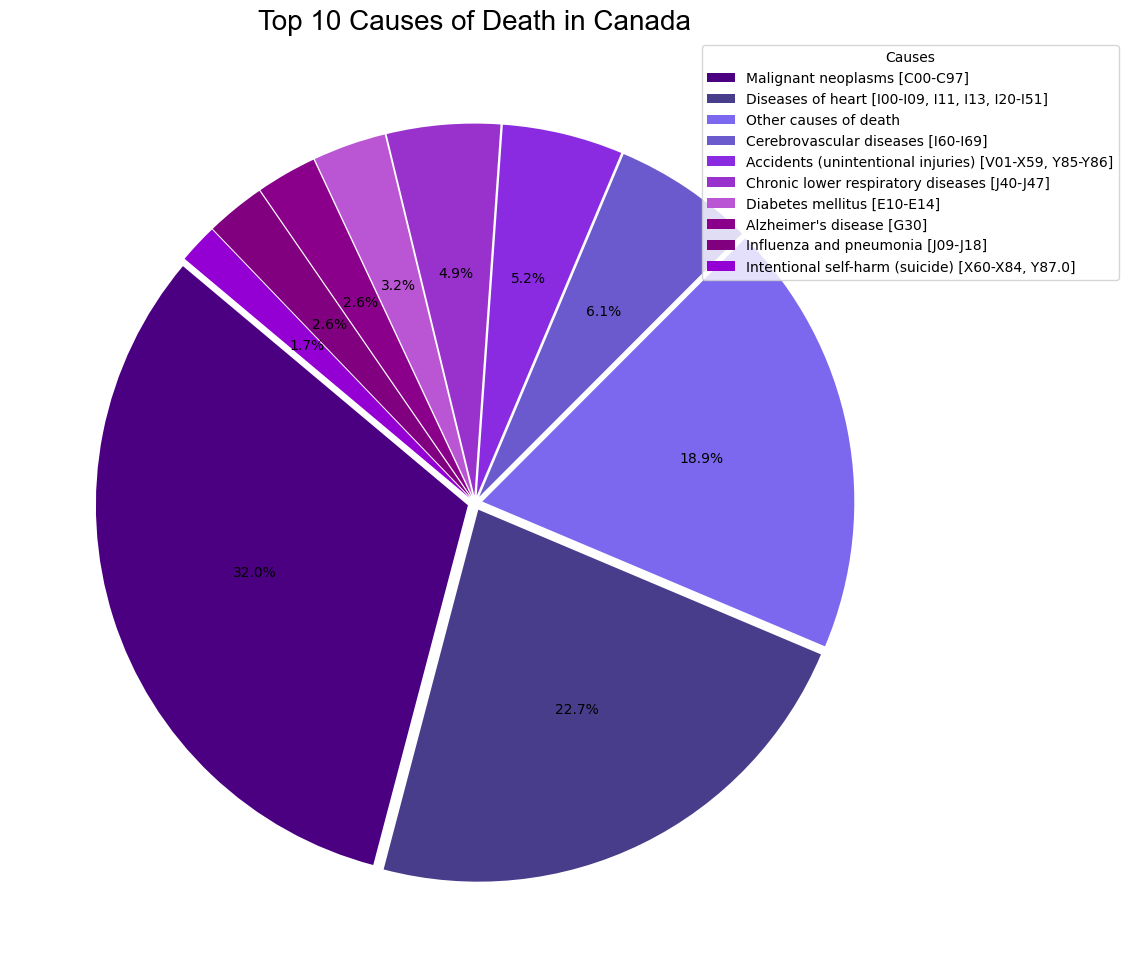

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

top_causes_df = top_10_causes_of_death.toPandas()

# Define the explode value for all slices
explode = tuple(0.02 for _ in range(len(top_causes_df)))

purple_hues = ['indigo', 'darkslateblue', 'mediumslateblue', 'slateblue', 'blueviolet', 'darkorchid', 'mediumorchid', 'darkmagenta', 'purple', 'darkviolet']

# Plotting an exploded pie chart with custom colors using Pandas DataFrame
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(top_causes_df['total_deaths'], autopct='%1.1f%%', 
                                   startangle=140, explode=explode, colors=purple_hues)

# Add a legend below the plot
plt.legend(wedges, top_causes_df['cause'], 
           title='Causes', loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)
plt.subplots_adjust(top=1)
plt.title('Top 10 Causes of Death in Canada', 
          fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.savefig('top_causes_pie_chart.png', bbox_inches='tight', dpi = 150)  # Use bbox_inches to include the legend in the saved image
plt.show()


# 3.2.1 The pie chart depicts the top ten cause of death in Canada between 2000 and 2022.

This pie chart gives a detailed breakdown of the top 10 causes of death in the country.

Malignant Neoplasms, accounting for 22.7% of the total deaths, were the leading cause. This was closely followed by Diseases of the Heart, which contributed to 18.9% of the deaths.

Accidents (Unintentional Injuries) were the third leading cause, accounting for 12% of the total deaths. This category saw a significant increase, fueled by fatal overdoses and falls, which rose by 14.5% in 2021.

Chronic Lower Respiratory Diseases and Cerebrovascular Diseases were also significant contributors, accounting for 6.1% and 5.2% of the deaths, respectively.

Other notable causes included Alzheimer’s Disease (3.2%), Diabetes Mellitus (2.6%), Influenza and Pneumonia (1.7%), and Intentional Self-Harm (Suicide).

### 3.3 Pyspark SQL Analysis : Top 10 causes of death in Canada, 2017-2022

In [10]:
sql_query2 = """
    SELECT
        cause,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = "Canada" AND cause != "Total - all causes [A00-Y89]" AND year >= 2017
    GROUP BY cause
    ORDER BY total_deaths DESC
    LIMIT 10
"""

top_10_causes_of_death2 = spark.sql(sql_query2)
top_10_causes_of_death2.show()

+--------------------+------------+
|               cause|total_deaths|
+--------------------+------------+
|Malignant neoplas...|      973194|
|Other causes of d...|      752768|
|Diseases of heart...|      656238|
|Accidents (uninte...|      201712|
|Cerebrovascular d...|      164730|
|Chronic lower res...|      148372|
|COVID-19 [U07.1, ...|      100144|
|Diabetes mellitus...|       86944|
|Influenza and pne...|       78242|
|Alzheimer's disea...|       71950|
+--------------------+------------+



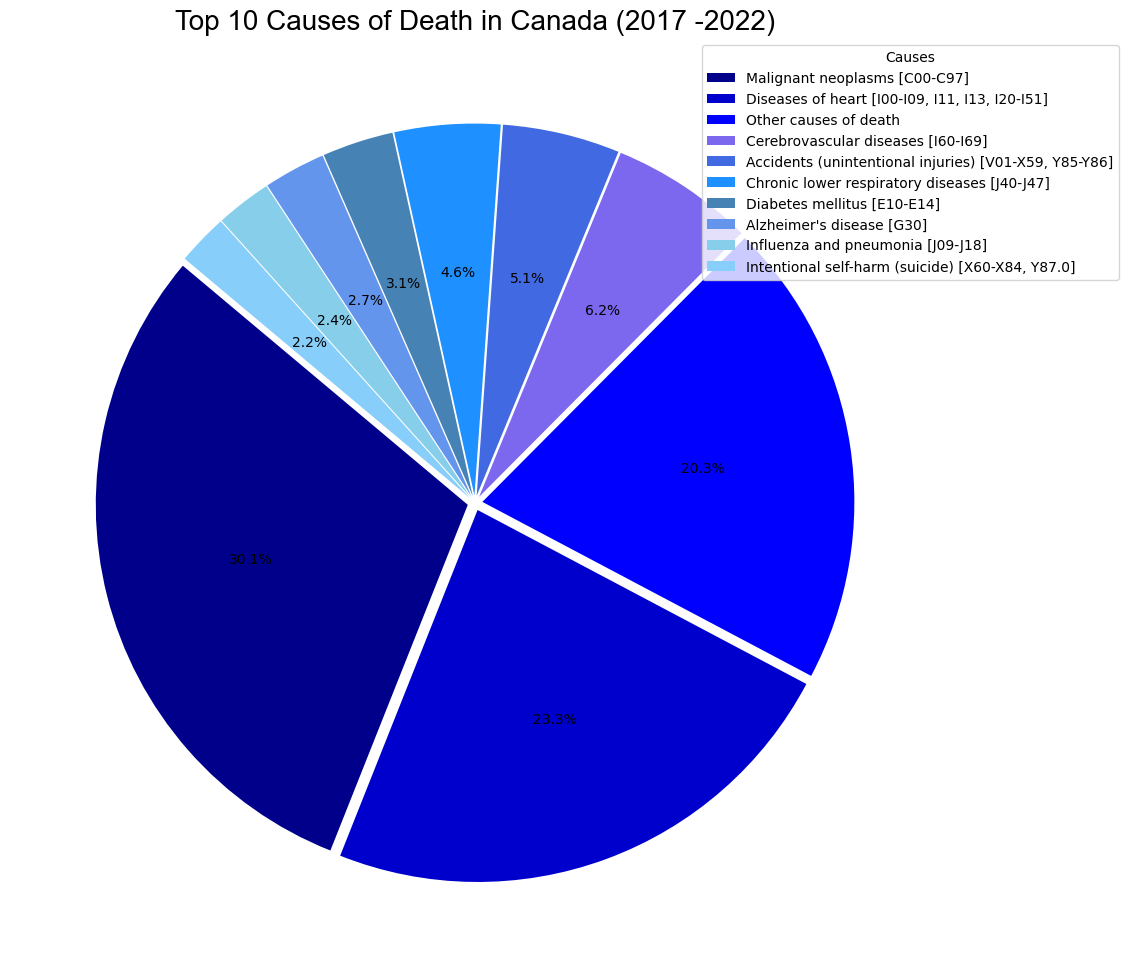

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

top_causes = top_10_causes_of_death2.toPandas()

# Define the explode value for all slices
explode = tuple(0.02 for _ in range(len(top_causes_df)))

# Plotting an exploded pie chart with custom colors using Pandas DataFrame
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(top_causes['total_deaths'], autopct='%1.1f%%', 
                                   startangle=140, explode=explode, colors=ocean_blues)

# Add a legend below the plot
plt.legend(wedges, top_causes_df['cause'], 
           title='Causes', loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)
plt.subplots_adjust(top=1)
plt.title('Top 10 Causes of Death in Canada (2017 -2022)', 
          fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.savefig('top_causes_pie_chart.png', bbox_inches='tight', dpi = 150)  # Use bbox_inches to include the legend in the saved image
plt.show()


#### 3.3.1 The pie chart depicts the top ten cause of death in Canada between 2017 and 2022.

This pie chart gives a detailed breakdown of the top 10 causes of death in Canada from 2017 to 2022.

Malignant Neoplasms (C00-C97), accounting for 38.1% of the total deaths, were the leading cause. This was followed by Diseases of the Heart (I00-I09, I11, I20-I51), which contributed to 23.3% of the deaths.

Accidents (Unintentional Injuries) (V01-X59, Y85-Y86) were the third leading cause, accounting for 10.2% of the total deaths.

Chronic Lower Respiratory Diseases (J40-J47) and Diabetes Mellitus (E10-E14) were also significant contributors, accounting for 6.2% and 5.1% of the deaths, respectively.

Other notable causes included Alzheimer’s Disease (G30), Influenza and Pneumonia (J09-J18), Intentional Self-Harm (Suicide) (X60-X84, Y87.0), Cerebrovascular Diseases (I60-I69), and Other Causes of Death.

### 3.4 Pyspark SQL Analysis : Male to Female ration for deaths in Canada (2000 - 2022)

In [12]:
# Define and execute the SQL query to get the total number of deaths for men and women
sql_query3 = """
    SELECT
        sex,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = 'Canada' AND cause = 'Total - all causes [A00-Y89]' AND sex IN ('male', 'female')
    GROUP BY sex
    ORDER BY total_deaths DESC
"""

# Execute the query and store the result in a variable
total_deaths_by_sex = spark.sql(sql_query3)

# Show the result
total_deaths_by_sex.show()

+------+------------+
|   sex|total_deaths|
+------+------------+
|  male|     2982832|
|female|     2877910|
+------+------------+



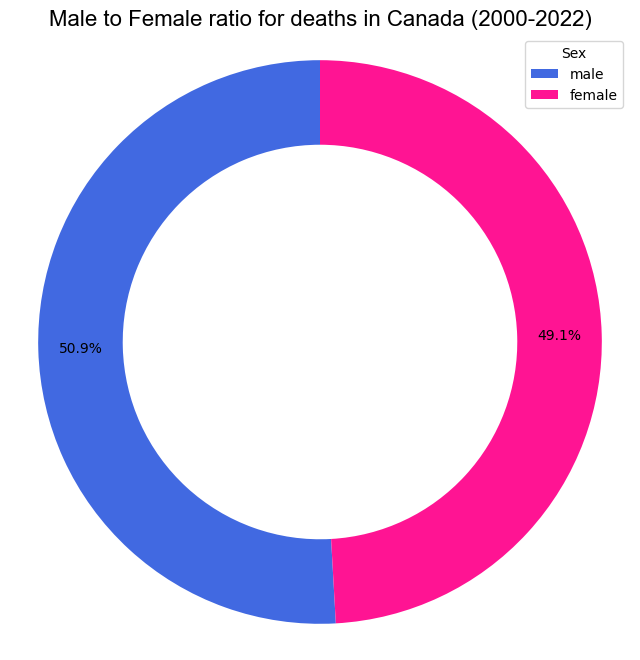

In [13]:
import matplotlib.pyplot as plt

# Assuming 'sex' and 'total_deaths' are the column names in total_deaths_by_sex
total_deaths_df = total_deaths_by_sex.toPandas()

# Define colors for males and females
colors2 = ['#4169E1', '#FF1493']  # Blue: RoyalBlue, Pink/Purple: DeepPink

# Plotting a donut pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_deaths_df['total_deaths'], autopct='%1.1f%%', startangle=90, colors=colors2, wedgeprops=dict(width=0.3), pctdistance=0.85)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the top-right corner
plt.legend(wedges, total_deaths_df['sex'], title='Sex', loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1)

plt.title('Male to Female ratio for deaths in Canada (2000-2022)', fontdict={'fontname': 'Arial', 'fontsize': 16})
# Display the chart
plt.show()


#### 3.4.1 The data suggests a relatively balanced distribution of death rates between men and women from year 2000 and 2022, with a slight majority of deaths among men (50.9%) compared to women (49.1%).

### 3.5 Pyspark SQL Analysis : Male to Female ration for deaths in Canada (2017 - 2022)

In [14]:
sql_query4 = """
    SELECT
        sex,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = 'Canada' AND cause = 'Total - all causes [A00-Y89]' AND sex IN ('male', 'female') AND year >= 2017
    GROUP BY sex
    ORDER BY total_deaths DESC
"""

total_deaths_by_sex2 = spark.sql(sql_query4)

# Show the result
print("Total deaths in Canada (2017-2022) by sex:")
total_deaths_by_sex2.show()


Total deaths in Canada (2017-2022) by sex:
+------+------------+
|   sex|total_deaths|
+------+------------+
|  male|      931761|
|female|      871675|
+------+------------+



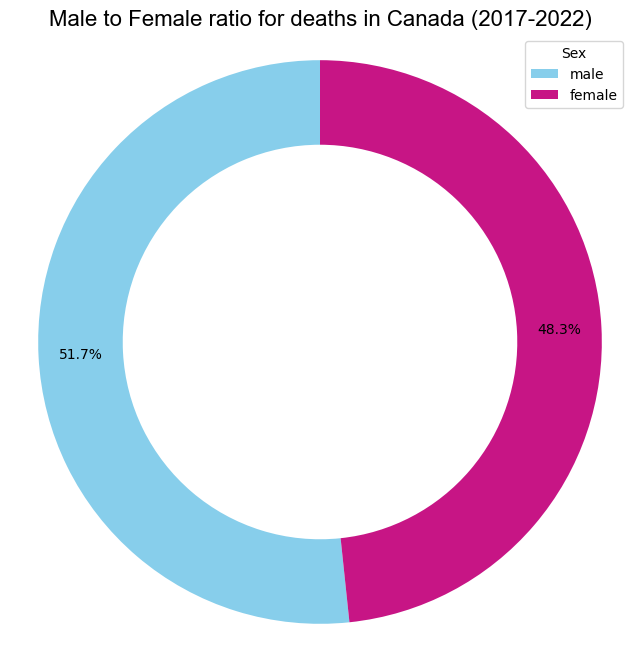

In [15]:
import matplotlib.pyplot as plt

# Assuming 'sex' and 'total_deaths' are the column names in total_deaths_by_sex
total_deaths_df2 = total_deaths_by_sex2.toPandas()

# Define colors for males and females
colors5 = ['#87CEEB', '#C71585']  # Blue: DodgerBlue, Pink/Purple: HotPink

# Plotting a donut pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_deaths_df2['total_deaths'], autopct='%1.1f%%', startangle=90, colors=colors5, wedgeprops=dict(width=0.3), pctdistance=0.85)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the top-right corner
plt.legend(wedges, total_deaths_df2['sex'], title='Sex', loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1)

plt.title('Male to Female ratio for deaths in Canada (2017-2022)', fontdict={'fontname': 'Arial', 'fontsize': 16})
# Display the chart
plt.show()


#### 3.5.1 The data suggests a relatively balanced distribution of death rates between men and women from year 2017 and 2022, with a slight majority of deaths among men (51.7%) compared to women (48.3%).

### 3.6 Pyspark SQL Analysis : Total death by gender (2000-2022)

In [16]:
# Define and execute the Spark SQL query to get the number of deaths for males and females per year
sql_query5 = """
    SELECT year,
        sex,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE cause != 'Total - all causes [A00-Y89]' AND sex != 'both'
    GROUP BY year, sex
    ORDER BY year, sex
"""

# Execute the query and store the result in a DataFrame
gender_totals_spark = spark.sql(sql_query5)

# Show the result
gender_totals_spark.show()

+----+------+------------+
|year|   sex|total_deaths|
+----+------+------------+
|2000|female|      212636|
|2000|  male|      223465|
|2001|female|      215053|
|2001|  male|      223971|
|2002|female|      220671|
|2002|  male|      226527|
|2003|female|      222528|
|2003|  male|      229808|
|2004|female|      224140|
|2004|  male|      229014|
|2005|female|      228234|
|2005|  male|      231976|
|2006|female|      225857|
|2006|  male|      230294|
|2007|female|      233070|
|2007|  male|      237362|
|2008|female|      236378|
|2008|  male|      240832|
|2009|female|      236211|
|2009|  male|      240616|
+----+------+------------+
only showing top 20 rows



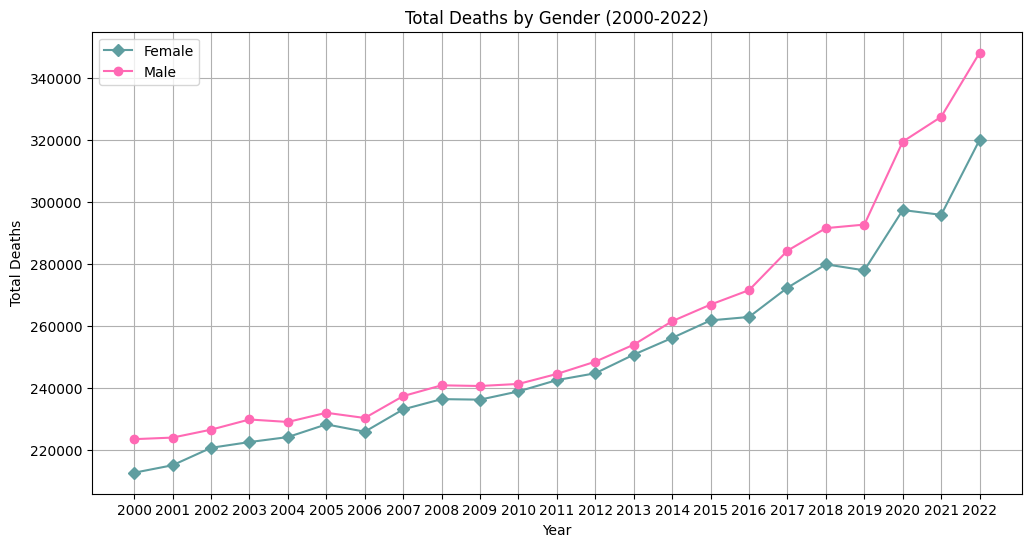

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gender_totals_spark is your DataFrame
# Convert Spark DataFrame to Pandas DataFrame
gender_totals_pandas = gender_totals_spark.toPandas()

# Pivot the DataFrame to have separate columns for male and female
gender_totals_pivot = gender_totals_pandas.pivot(index='year', columns='sex', values='total_deaths')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(gender_totals_pivot.index, gender_totals_pivot['female'], label='Female', marker='D', color='#5F9EA0')
plt.plot(gender_totals_pivot.index, gender_totals_pivot['male'], label='Male', marker='o', color='#FF69B4')

# Set plot details
plt.title('Total Deaths by Gender (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)

# Increase the number of ticks on the x-axis
plt.xticks(gender_totals_pivot.index)

plt.show()


#### 3.6.1 The line graph indicates a general upward trend in total deaths for both males and females over the years, indicating a potential increase in mortality rates.

The line graph above gives a detailed breakdown of the total deaths by gender in Canada from 2000 to 2022.

Males and Females both showed an increase in total deaths over this period. However, the rate of increase was different for each gender.

For Females, the increase was more gradual over the years. There was no significant spike observed in the female death trend.

For Males, there was a steady increase over the years similar to females until 2019. However, starting from 2019, there was a significant spike in male deaths, reaching its peak in 2022. This indicates an alarming rise in male deaths in recent years.

For most of the period (2000-2018), both genders experienced a relatively similar rate of increase in total deaths. A divergence is noted from 2019 onwards where male deaths increased at a much higher rate compared to females.

### 3.7 Data frame API : Total death by province (2000 - 2022)

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, desc

# Define and execute the Spark SQL query to get the number of deaths for males and females per year
residence_spark = (
    death_data
    .filter(col('residence') != 'Canada')
    .groupBy('residence')
    .agg(sum('value').alias('total_deaths'))
    .orderBy(col('total_deaths').desc())
)

# Show the result
residence_spark.show()

+--------------------+------------+
|           residence|total_deaths|
+--------------------+------------+
|             Ontario|     8715096|
|              Quebec|     5643388|
|    British Columbia|     3126524|
|             Alberta|     2083432|
|            Manitoba|      963368|
|        Saskatchewan|      865068|
|         Nova Scotia|      812588|
|       New Brunswick|      627112|
|Newfoundland and ...|      442996|
|Prince Edward Island|      116140|
|Northwest Territo...|       19068|
|             Nunavut|       14920|
|               Yukon|       12488|
+--------------------+------------+



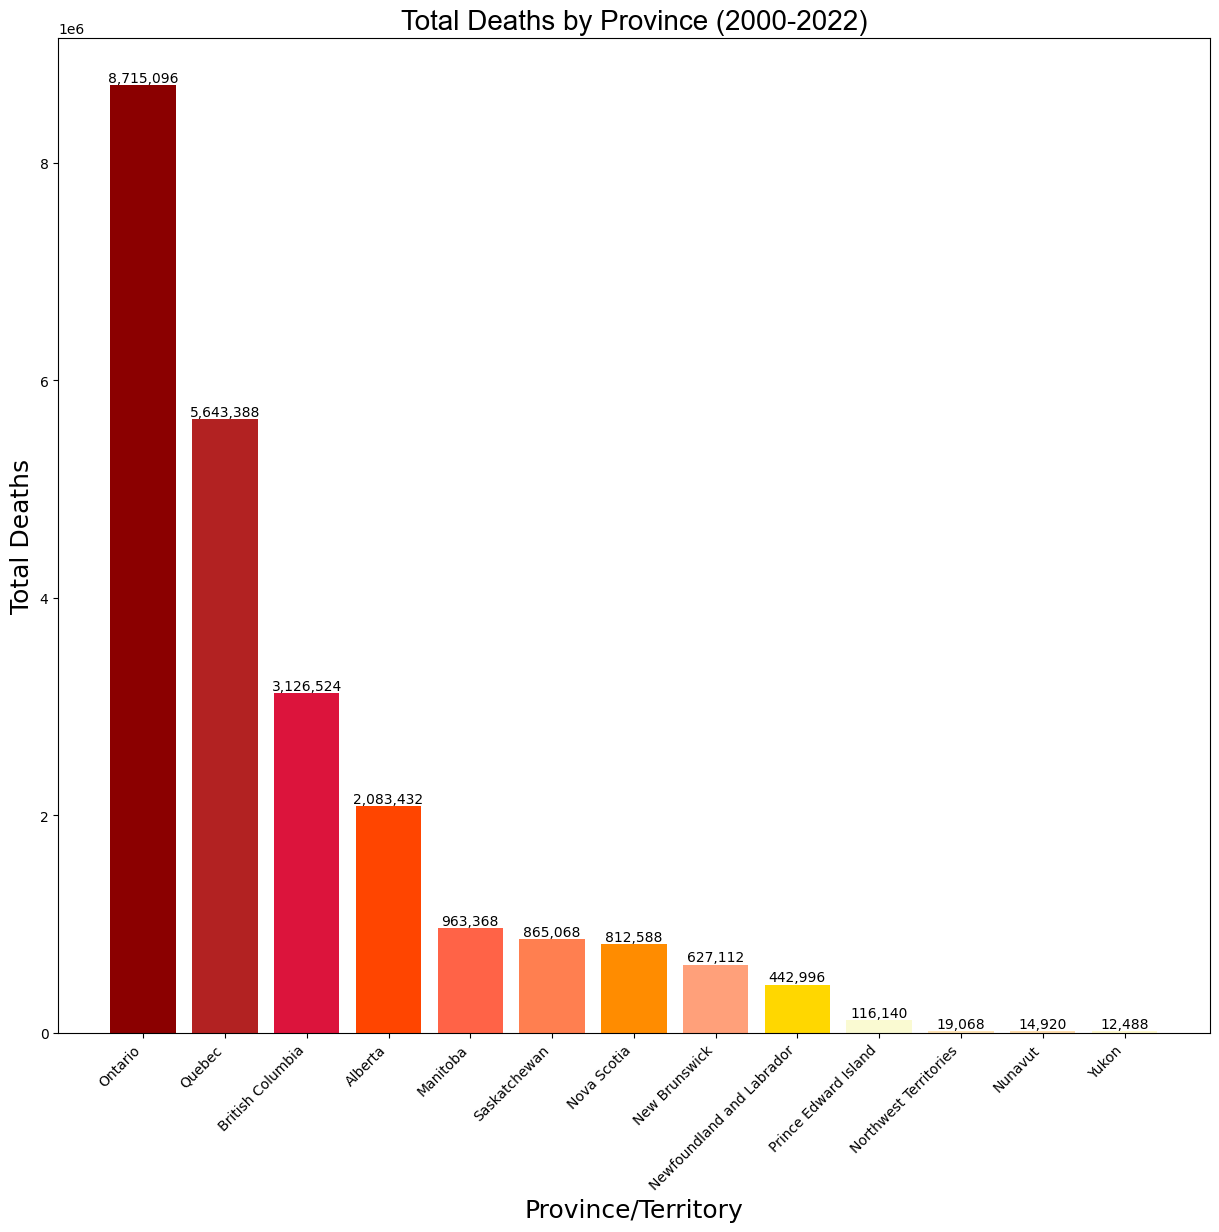

In [19]:
residence_pd = residence_spark.toPandas()


# Plotting a vertical bar chart with forest canopy colors
plt.style.use('default')
plt.figure(figsize=(12, 12))
bars = plt.bar(residence_pd['residence'], residence_pd['total_deaths'], color= red_based)

# Annotate the bars with their respective numbers
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

# Display the bar chart
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right') 
# Adjust layout to prevent clipping of labels
plt.tight_layout()  

# Title, x-labels, and y-labels
plt.title('Total Deaths by Province (2000-2022)', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('Province/Territory', fontsize=18)  
plt.ylabel('Total Deaths', fontsize=18)  
plt.show()


#### 3.7.1 Total Deaths by Province in Canada (2000 - 2022)

The bar graph above gives a detailed breakdown of the total deaths by province in Canada from 2000 to 2022.

Ontario had the highest number of deaths, with approximately 8,715,096 deaths.

Quebec was the second highest, with approximately 5,643,388 deaths.

British Columbia followed with over 3 million deaths.

Alberta and Manitoba had over 2 million and close to 1 million deaths respectively.

The remaining provinces/territories each had fewer than a million total deaths.

### 3.8 Pyspark SQL Analysis : Top 10 Causes of Death for Males in Ontario (2017-2022)

In [20]:
# Define and execute the SQL query to get the top 5 causes of death for men in Ontario
sql_query_men = """
    SELECT
        cause,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = "Ontario" AND sex = "male" AND cause != "Total - all causes [A00-Y89]"
    AND (year >= 2017)
    GROUP BY cause
    ORDER BY total_deaths DESC
    LIMIT 10
"""

top_10_causes_men = spark.sql(sql_query_men)


# Show the results
print("Top 10 Causes of Death for Men in Ontario (2017 - 2022):")
top_10_causes_men.show()


Top 10 Causes of Death for Men in Ontario (2017 - 2022):
+--------------------+------------+
|               cause|total_deaths|
+--------------------+------------+
|Malignant neoplas...|       94889|
|Diseases of heart...|       67950|
|Other causes of d...|       64390|
|Accidents (uninte...|       24131|
|Cerebrovascular d...|       13367|
|Chronic lower res...|       12744|
|COVID-19 [U07.1, ...|        9432|
|Diabetes mellitus...|        8934|
|Influenza and pne...|        7181|
|Intentional self-...|        6166|
+--------------------+------------+



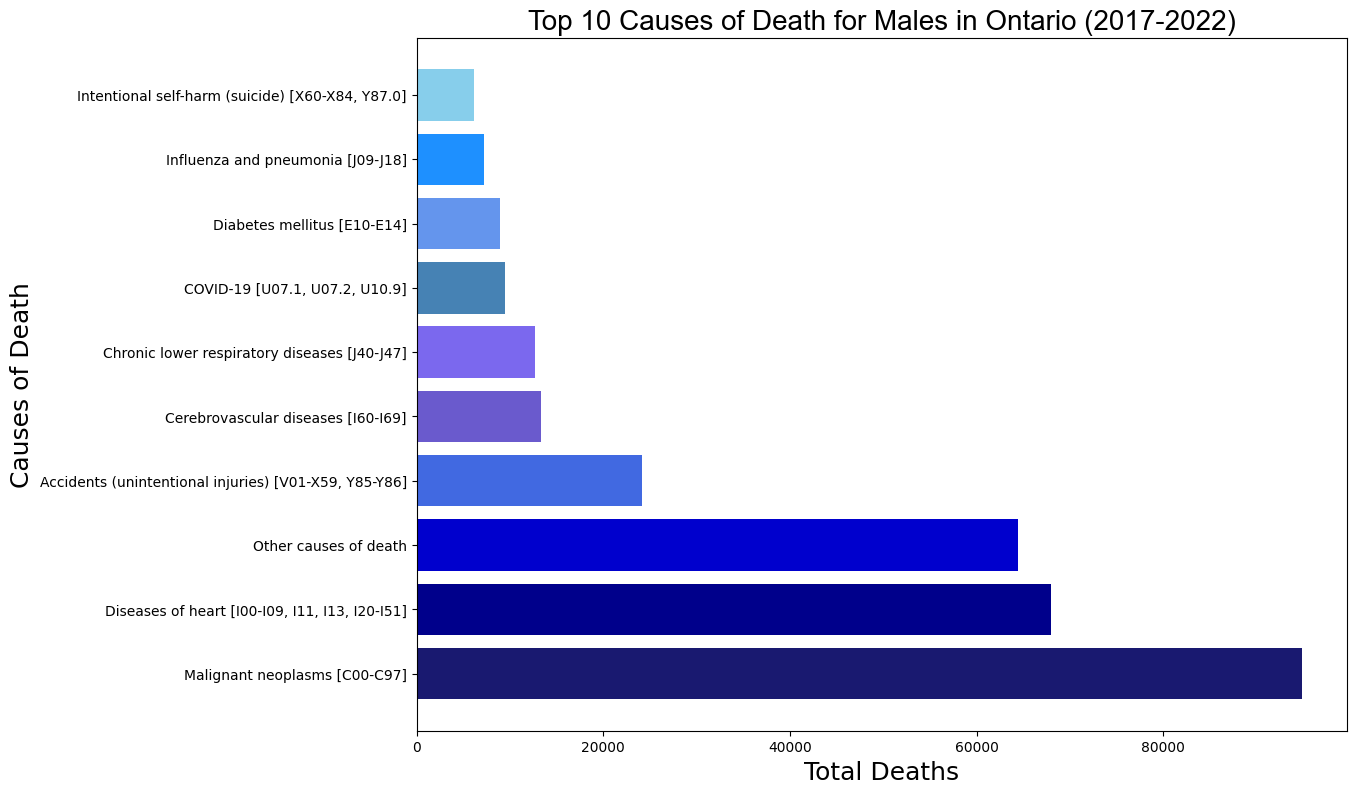

In [21]:
df_men = top_10_causes_men.toPandas()

# Plot the horizontal bar chart for women
plt.figure(figsize=(12, 9))
plt.barh(df_men['cause'], df_men['total_deaths'], color=cool_blues)  # Adjust color if needed
plt.title('Top 10 Causes of Death for Males in Ontario (2017-2022)', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('Total Deaths', fontsize=18) 
plt.ylabel('Causes of Death', fontsize=18) 

# Show the horizontal bar chart for women
plt.show()

##### 3.8.1 The graph indicates that chronic diseases such as malignant neoplasms, diseases of the heart, chronic lower respiratory diseases, diabetes mellitus, and cerebrovascular diseases contribute significantly to causes of total deaths among Males in Canada.

### 3.9 Pyspark SQL Analysis : Top 10 Causes of Death for Women in Ontario (2017 - 2022)

In [22]:
# Define and execute the SQL query to get the top 5 causes of death for women in Ontario
sql_query_women = """
    SELECT
        cause,
        SUM(value) AS total_deaths
    FROM death_table
    WHERE residence = "Ontario" AND sex = "female" AND cause != "Total - all causes [A00-Y89]"
    AND (year >= 2017)
    GROUP BY cause
    ORDER BY total_deaths DESC
    LIMIT 10
"""

top_10_causes_women = spark.sql(sql_query_women)
print("Top 10 Causes of Death for Women in Ontario (2017 - 2022):")
top_10_causes_women.show()

Top 10 Causes of Death for Women in Ontario (2017 - 2022):
+--------------------+------------+
|               cause|total_deaths|
+--------------------+------------+
|Malignant neoplas...|       84930|
|Other causes of d...|       80346|
|Diseases of heart...|       56548|
|Cerebrovascular d...|       17161|
|Accidents (uninte...|       16245|
|Chronic lower res...|       13074|
|COVID-19 [U07.1, ...|        8334|
|Alzheimer's disea...|        7665|
|Influenza and pne...|        7515|
|Diabetes mellitus...|        7075|
+--------------------+------------+



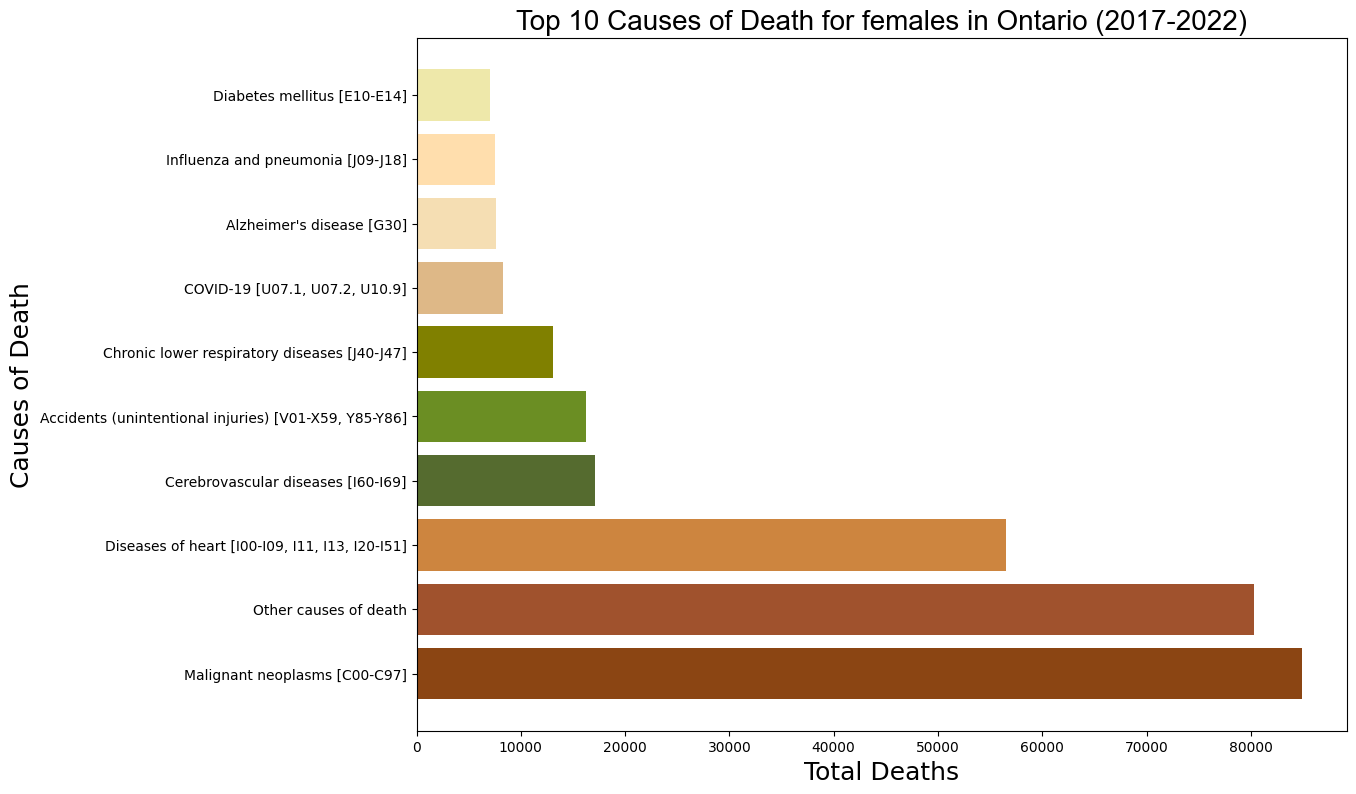

In [23]:
df_women = top_10_causes_women.toPandas()

# Plot the horizontal bar chart
plt.figure(figsize=(12, 9))
plt.barh(df_women['cause'], df_women['total_deaths'], color=earth_tones)
plt.title('Top 10 Causes of Death for females in Ontario (2017-2022)', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('Total Deaths', fontsize=18) 
plt.ylabel('Causes of Death', fontsize=18) 

# Show the horizontal bar chart
plt.show()

##### 3.9.1 The graph indicates that chronic diseases such as malignant neoplasms, diseases of the heart, chronic lower respiratory diseases, diabetes mellitus, and cerebrovascular diseases contribute significantly to causes of total deaths among Females in Canada.

### 4.0 Data frame API : Malignant neoplasms death trends in Ontario Canada (2017-2022)

In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Filter the DataFrame based on the specified conditions
filtered_df = death_data.filter(
    (col("residence") == "Ontario") &
    (col("sex") != "both") &
    (col("cause").isin("Malignant neoplasms [C00-C97]")) &
    (col("year").between(2017, 2022))
)

# Group by year and sex, and calculate the total deaths
result_df = (
    filtered_df
    .groupBy("year", "sex")
    .agg(sum("value").alias("total_deaths"))
    .orderBy("year")  # Order the result by year in ascending order
)

# Show the result
result_df.show()


+----+------+------------+
|year|   sex|total_deaths|
+----+------+------------+
|2017|  male|       15435|
|2017|female|       13982|
|2018|female|       14006|
|2018|  male|       15696|
|2019|female|       13704|
|2019|  male|       15791|
|2020|female|       14216|
|2020|  male|       15786|
|2021|  male|       16201|
|2021|female|       14550|
|2022|female|       14472|
|2022|  male|       15980|
+----+------+------------+



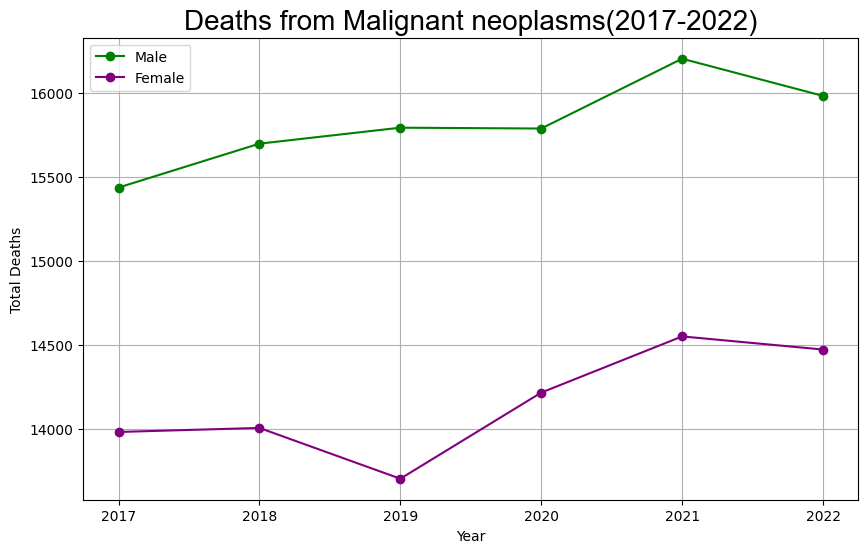

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming result_df is your PySpark DataFrame
# Convert PySpark DataFrame to Pandas DataFrame
result_pandas = result_df.toPandas()

# Separate data for males and females
males = result_pandas[result_pandas['sex'] == 'male']
females = result_pandas[result_pandas['sex'] == 'female']

# Create a line graph for males with green color
plt.figure(figsize=(10, 6))
plt.plot(males['year'], males['total_deaths'], marker='o', linestyle='-', color='green', label='Male')

# Create a line graph for females with purple color
plt.plot(females['year'], females['total_deaths'], marker='o', linestyle='-', color='purple', label='Female')

# Set plot details
plt.title('Deaths from Malignant neoplasms(2017-2022)', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()  # Display legend to differentiate lines
plt.grid(True)

# Display the line graph
plt.show()


##### 4.0.1 Total Deaths by Year and Sex in Canada (2017 - 2022)

The line graph above gives a detailed breakdown of the total deaths by year and sex in Canada from 2017 to 2022.

The line graph shows that there is a noticeable fluctuation in total deaths from Malignant neoplasms across the years 2017 to 2022. 

For Males, the total deaths have increased steadily from around 15,500 in 2017 to slightly above 16,000 in 2022.

For Females, the total deaths decreased from approximately 14,500 in 2017 to nearly 14,000 in 2020 before increasing slightly in the subsequent years.

A general upward trend is observed, with a peak in 2021 for both males and females.

### 4.1 Data frame API : Cerebrovascular diseases death trends in Ontario Canada (2017-2022)

In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col

# Filter data for specified causes, residence, and group by year and gender
selected_causes = [
    "Diseases of heart [I00-I09, I11, I13, I20-I51]",
    "Cerebrovascular diseases [I60-I69]"
]

neoplasms_trend = (
    death_data
    .filter(
        (col("cause").isin(selected_causes)) &
        (col("residence") == "Ontario") &
        (col("sex") != "both") &
        (col("year").between(2017, 2022)) &
        (col("value") > 0)
    )
    .groupBy("year", "cause", "sex")  # Include gender in grouping
    .agg(sum("value").alias("total_deaths"))
    .orderBy("year", "cause", "sex")
)

neoplasms_trend.show(40)


+----+--------------------+------+------------+
|year|               cause|   sex|total_deaths|
+----+--------------------+------+------------+
|2017|Cerebrovascular d...|female|        2886|
|2017|Cerebrovascular d...|  male|        2198|
|2017|Diseases of heart...|female|        9118|
|2017|Diseases of heart...|  male|       10793|
|2018|Cerebrovascular d...|female|        2863|
|2018|Cerebrovascular d...|  male|        2154|
|2018|Diseases of heart...|female|        9304|
|2018|Diseases of heart...|  male|       11002|
|2019|Cerebrovascular d...|female|        2902|
|2019|Cerebrovascular d...|  male|        2190|
|2019|Diseases of heart...|female|        9134|
|2019|Diseases of heart...|  male|       11074|
|2020|Cerebrovascular d...|female|        2910|
|2020|Cerebrovascular d...|  male|        2388|
|2020|Diseases of heart...|female|        9583|
|2020|Diseases of heart...|  male|       11503|
|2021|Cerebrovascular d...|female|        2772|
|2021|Cerebrovascular d...|  male|      

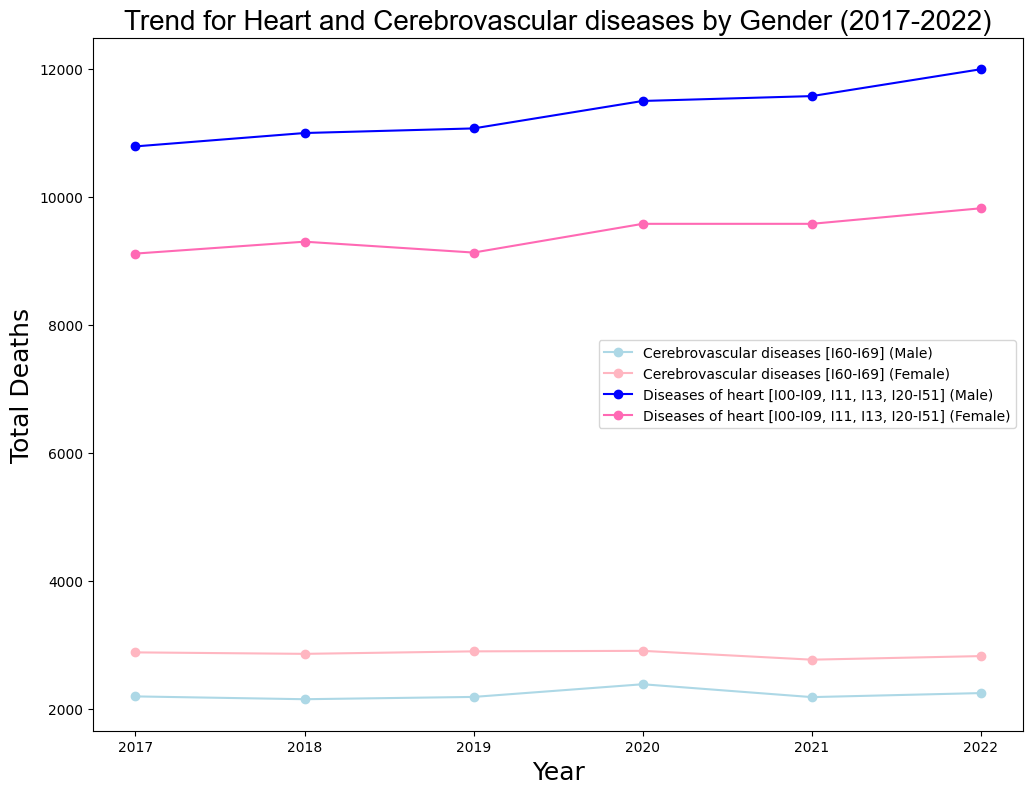

In [27]:
# Convert the Spark DataFrame to a Pandas DataFrame for visualization
neoplasms_trend_pd = neoplasms_trend.toPandas()

sex_cause_colors = {
    ("male", "Diseases of heart [I00-I09, I11, I13, I20-I51]"): 'blue',
    ("female", "Diseases of heart [I00-I09, I11, I13, I20-I51]"): 'hotpink',
    ("male", "Cerebrovascular diseases [I60-I69]"): 'lightblue',
    ("female", "Cerebrovascular diseases [I60-I69]"): 'lightpink'
}

# Plotting
plt.figure(figsize=(12, 9))
for cause in neoplasms_trend_pd["cause"].unique():
    for sex in ["male", "female"]:
        cause_data = neoplasms_trend_pd[(neoplasms_trend_pd["cause"] == cause) & (neoplasms_trend_pd["sex"] == sex)]
        plt.plot(cause_data["year"], cause_data["total_deaths"], 
                 label=f"{cause} ({sex.capitalize()})", marker='o',
                 color=sex_cause_colors.get((sex, cause), 'black'))

plt.title("Trend for Heart and Cerebrovascular diseases by Gender (2017-2022)", fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel("Year", fontsize=18) 
plt.ylabel("Total Deaths", fontsize=18) 
plt.legend()
plt.show()


##### 3.4.1 The line graph shows diseases of the Heart consistently exhibit a higher total death count compared to Cerebrovascular diseases across all years. This emphasizes the substantial impact of heart-related conditions on mortality. Both Cerebrovascular diseases and Diseases of the Heart show gender-specific patterns, with males consistently experiencing higher mortality rates.

#### 3.4.2 Conclusion

1. Top 10 Causes of Death in Canada (2017 - 2022): The leading causes of death were Malignant Neoplasms and Diseases of the Heart, accounting for 22.7% and 18.9% respectively. Accidents (Unintentional Injuries) were also a significant cause, accounting for 12% of the total deaths.

2. Male to Female Ratio for Deaths in Canada (2000 - 2022): Males accounted for 50.9% of the total deaths, slightly more than females who accounted for 49.1% of the total deaths.

3. Total Deaths by Year and Sex in Canada (2017 - 2022): For males, the total deaths increased steadily from around 15,500 in 2017 to slightly above 16,000 in 2022. For females, the total deaths decreased from approximately 14,500 in 2017 to nearly 14,000 in 2020 before increasing slightly in the subsequent years.

4. Total Deaths by Residence in Canada (2000 - 2022): Ontario had the highest number of deaths, followed by Quebec and British Columbia. The remaining provinces/territories each had fewer than a million total deaths.

These analysis provide valuable insights into the health challenges faced by Canadians and can guide future public health strategies and policies. 

#### Based on the analysis of the data, here are some suggestions we propose:

Healthcare Prioritization: Given that Malignant Neoplasms and Diseases of the Heart are the leading causes of death, healthcare resources and research could be prioritized towards these areas. This includes promoting early detection, improving treatment methods, and educating the public about prevention strategies.

Accident Prevention: With Accidents (Unintentional Injuries) being a significant cause of death, there’s a need for effective accident prevention strategies. This could involve improving safety regulations, conducting public safety campaigns, and providing better resources for substance abuse treatment.

Gender-Specific Healthcare: The data shows a slight difference in the number of deaths between males and females. It might be beneficial to investigate the reasons behind this disparity and consider gender-specific healthcare strategies.

Regional Healthcare Strategies: The high number of deaths in provinces like Ontario and Quebec suggests a need for region-specific healthcare strategies. Understanding the unique challenges in these regions could help in developing effective health policies.

Yearly Health Trends: The increase in total deaths for both males and females over the years indicates a need for improved healthcare strategies. Regular health trend analysis can help in identifying problem areas and taking timely action.